# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(news_api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='bitcoin', language="en", page_size=100, sort_by="relevancy")
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")
# Show sample article
bitcoin_news["articles"][0]

Total articles about Bitcoin: 8701


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'David Murphy',
 'title': 'What You Need to Know About Buying Cryptocurrency on PayPal',
 'description': 'Whether you’re looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, you’ll be able to pay various merchants using your cryptocurrency stas…',
 'url': 'https://lifehacker.com/what-you-need-to-know-about-buying-cryptocurrency-on-pa-1846585705',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/qvc2foo4ufow1cbsuk9f.jpg',
 'publishedAt': '2021-03-31T14:00:00Z',
 'content': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='ethereum', language="en", page_size=100, sort_by="relevancy" )
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")
# Show sample article
ethereum_news["articles"][0]

Total articles about Ethereum: 2753


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,0.0772,0.039,0.0,0.961,Whether youre looking to make a larger investm...
1,0.5859,0.127,0.0,0.873,"As it promised earlier this year, Tesla now ac..."
2,0.6124,0.135,0.0,0.865,The crypto industry as a whole has seen a mome...
3,0.3182,0.065,0.0,0.935,The inevitable has happened: You can now purch...
4,0.2023,0.050,0.0,0.950,Tesla made headlines earlier this year when it...


In [8]:
bitcoin_sentiments

[{'compound': 0.0772,
  'positive': 0.039,
  'negative': 0.0,
  'neutral': 0.961,
  'text': 'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]'},
 {'compound': 0.5859,
  'positive': 0.127,
  'negative': 0.0,
  'neutral': 0.873,
  'text': 'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]'},
 {'compound': 0.6124,
  'positive': 0.135,
  'negative': 0.0,
  'neutral': 0.865,
  'text': 'The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]'},
 {'compound': 0.3182,
  'positive': 0.065,
  'negative': 0.0,
  'n

In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

ethereum_df.head()

,compound,positive,negative,neutral,text
0,-0.5574,0.000,0.11,0.890,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.039,0.00,0.961,Whether youre looking to make a larger investm...
2,0.0000,0.000,0.00,1.000,Famed auction house Christies just sold its fi...
3,0.0000,0.000,0.00,1.000,Payment card network Visa has announced that t...
4,0.2732,0.062,0.00,0.938,"ConsenSys, a key player in crypto and a major ..."


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.144332,0.057140,0.022720,0.920140
std,0.342012,0.065721,0.044231,0.079752
min,-0.757900,0.000000,0.000000,0.660000
25%,0.000000,0.000000,0.000000,0.869500
50%,0.000000,0.048500,0.000000,0.933500
75%,0.366350,0.088750,0.038000,1.000000
max,0.908000,0.340000,0.198000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.136605,0.066960,0.028420,0.904630
std,0.400166,0.073804,0.045772,0.082209
min,-0.659700,0.000000,0.000000,0.688000
25%,-0.006450,0.000000,0.000000,0.846750
50%,0.012900,0.052000,0.000000,0.919000
75%,0.458800,0.110500,0.061000,0.972250
max,0.885800,0.273000,0.166000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text.""" 
        
    # Remove the punctuation
    # Remove the stop words
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    sw_addon = {'ab', 'youll', 'youre','chars'}
   
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    lower = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return lower




In [16]:
bitcoin_tokens = []
for row in bitcoin_df.text:
    bitcoin_tokens.append(tokenizer(row))
print(bitcoin_tokens)

[['whether', 'looking', 'make', 'larger', 'investment', 'want', 'dabble', 'cryptocurrencies', 'purchase', 'bitcoin', 'ethereum', 'bitcoin', 'cash', 'litecoin', 'paypal', 'soon', 'char'], ['promised', 'earlier', 'year', 'tesla', 'accepts', 'payment', 'bitcoin', 'according', 'teslas', 'website', 'tweet', 'ceo', 'elon', 'musk', 'subsequent', 'tweet', 'musk', 'said', 'bitcoin', 'paid', 'tesla', 'char'], ['crypto', 'industry', 'whole', 'ha', 'seen', 'momentous', 'year', 'growth', 'heavily', 'spurred', 'entrance', 'institutional', 'investor', 'adopting', 'bitcoin', 'due', 'store', 'value', 'property', 'spike', 'char'], ['inevitable', 'ha', 'happened', 'purchase', 'tesla', 'vehicle', 'bitcointhis', 'according', 'tesla', 'ceo', 'pardon', 'technoking', 'elon', 'musk', 'tweeted', 'wednesdayyou', 'buy', 'tesla', 'char'], ['tesla', 'made', 'headline', 'earlier', 'year', 'took', 'significant', 'holding', 'bitcoin', 'acquiring', 'roughly', 'billion', 'stake', 'thenprices', 'early', 'february', 'time

In [17]:
# Create a new tokens column for bitcoin
bitcoin_df['Tokens'] = pd.DataFrame({'Bitcoin': bitcoin_tokens})
bitcoin_df.head()

,compound,positive,negative,neutral,text,Tokens
0,0.0772,0.039,0.0,0.961,Whether youre looking to make a larger investm...,"[whether, looking, make, larger, investment, w..."
1,0.5859,0.127,0.0,0.873,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.6124,0.135,0.0,0.865,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, ha, seen, momentous,..."
3,0.3182,0.065,0.0,0.935,The inevitable has happened: You can now purch...,"[inevitable, ha, happened, purchase, tesla, ve..."
4,0.2023,0.050,0.0,0.950,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."


In [18]:
# Create a new tokens column for ethereum
ethereum_tokens = []
for row in ethereum_df.text:
    ethereum_tokens.append(tokenizer(row))

ethereum_df['Tokens'] = pd.DataFrame({'Ethereum': ethereum_tokens})
ethereum_df.head()

,compound,positive,negative,neutral,text,Tokens
0,-0.5574,0.000,0.11,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,0.0772,0.039,0.00,0.961,Whether youre looking to make a larger investm...,"[whether, looking, make, larger, investment, w..."
2,0.0000,0.000,0.00,1.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
3,0.0000,0.000,0.00,1.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, ha, announced, ..."
4,0.2732,0.062,0.00,0.938,"ConsenSys, a key player in crypto and a major ...","[consensys, key, player, crypto, major, propon..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
import numpy as np
from nltk import ngrams

In [20]:
flatten_bit_list = [item for subl in bitcoin_tokens for item in subl]
flatten_bit_list

['whether',
 'looking',
 'make',
 'larger',
 'investment',
 'want',
 'dabble',
 'cryptocurrencies',
 'purchase',
 'bitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'paypal',
 'soon',
 'char',
 'promised',
 'earlier',
 'year',
 'tesla',
 'accepts',
 'payment',
 'bitcoin',
 'according',
 'teslas',
 'website',
 'tweet',
 'ceo',
 'elon',
 'musk',
 'subsequent',
 'tweet',
 'musk',
 'said',
 'bitcoin',
 'paid',
 'tesla',
 'char',
 'crypto',
 'industry',
 'whole',
 'ha',
 'seen',
 'momentous',
 'year',
 'growth',
 'heavily',
 'spurred',
 'entrance',
 'institutional',
 'investor',
 'adopting',
 'bitcoin',
 'due',
 'store',
 'value',
 'property',
 'spike',
 'char',
 'inevitable',
 'ha',
 'happened',
 'purchase',
 'tesla',
 'vehicle',
 'bitcointhis',
 'according',
 'tesla',
 'ceo',
 'pardon',
 'technoking',
 'elon',
 'musk',
 'tweeted',
 'wednesdayyou',
 'buy',
 'tesla',
 'char',
 'tesla',
 'made',
 'headline',
 'earlier',
 'year',
 'took',
 'significant',
 'holding',
 'bitcoin',
 'acqu

In [21]:
full_btc_str = ' '.join([str(elem) for elem in flatten_bit_list])
full_btc_str

'whether looking make larger investment want dabble cryptocurrencies purchase bitcoin ethereum bitcoin cash litecoin paypal soon char promised earlier year tesla accepts payment bitcoin according teslas website tweet ceo elon musk subsequent tweet musk said bitcoin paid tesla char crypto industry whole ha seen momentous year growth heavily spurred entrance institutional investor adopting bitcoin due store value property spike char inevitable ha happened purchase tesla vehicle bitcointhis according tesla ceo pardon technoking elon musk tweeted wednesdayyou buy tesla char tesla made headline earlier year took significant holding bitcoin acquiring roughly billion stake thenprices early february time also noted sec char national burrito day land april fools day year thankfully restaurant arent playing around deal starting tomorrow restaurant like pollo loco moes southwest grill char one strictest crackdown worldwidephoto michele doying vergeindia reportedly moving forward sweeping ban cryp

In [22]:
# Generate the Bitcoin N-grams where N=2
bigram_btc_counts = Counter(ngrams(flatten_bit_list, n=2))
print(dict(bigram_btc_counts))

{('whether', 'looking'): 1, ('looking', 'make'): 1, ('make', 'larger'): 1, ('larger', 'investment'): 1, ('investment', 'want'): 1, ('want', 'dabble'): 1, ('dabble', 'cryptocurrencies'): 1, ('cryptocurrencies', 'purchase'): 1, ('purchase', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 1, ('ethereum', 'bitcoin'): 1, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'paypal'): 1, ('paypal', 'soon'): 1, ('soon', 'char'): 1, ('char', 'promised'): 1, ('promised', 'earlier'): 1, ('earlier', 'year'): 2, ('year', 'tesla'): 1, ('tesla', 'accepts'): 1, ('accepts', 'payment'): 1, ('payment', 'bitcoin'): 1, ('bitcoin', 'according'): 1, ('according', 'teslas'): 1, ('teslas', 'website'): 1, ('website', 'tweet'): 1, ('tweet', 'ceo'): 1, ('ceo', 'elon'): 3, ('elon', 'musk'): 7, ('musk', 'subsequent'): 1, ('subsequent', 'tweet'): 1, ('tweet', 'musk'): 1, ('musk', 'said'): 2, ('said', 'bitcoin'): 1, ('bitcoin', 'paid'): 1, ('paid', 'tesla'): 1, ('tesla', 'char'): 2, ('char', 'crypto'): 2, ('crypto'

In [23]:
# Generate the Ethereum N-grams where N=2
flatten_eth_list = [item for subl in ethereum_tokens for item in subl]
flatten_eth_list
bigram_eth_counts = Counter(ngrams(flatten_eth_list, n=2))
print(dict(bigram_eth_counts))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'char'): 1, ('char', 'whether'): 1, ('whether', 'looking'): 1, ('looking', 'make'): 1, ('make', 'larger'): 1, ('larger', 'investment'): 1, ('investment', 'want'): 1, ('want', 'dabble'): 1, ('dabble', 'cryptocurrencies'): 1, ('cryptocurrencies', 'purchase'): 1, ('purchase', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 2, ('ethereum', 'bitcoin'): 1, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'paypal'): 1, ('paypal', 'soon'): 1, ('soon', 'char'): 1, ('char', 'famed'): 1, ('famed', 'auction'): 1,

In [24]:
full_eth_str = ' '.join([str(elem) for elem in flatten_eth_list])
full_eth_str

'one strictest crackdown worldwidephoto michele doying vergeindia reportedly moving forward sweeping ban cryptocurrencies according reuters country legislat char whether looking make larger investment want dabble cryptocurrencies purchase bitcoin ethereum bitcoin cash litecoin paypal soon char famed auction house christies sold first purely digital piece art whopping million price buyer got digital file collage image complex legac char payment card network visa ha announced transaction settled using usd coin usdc stablecoin powered ethereum blockchain cryptocom first company test new capabi char consensys key player crypto major proponent ethereum blockchain ha raised million funding round fromjp morgan mastercard ubs ag well major blockchain compan char move fast break thing get hackedthats happened roll social currency platform allows creator mint distribute ethereumbased cryptocurrency known social char nft craze ha intriguing moment digital artist seen seen great leap tech ha allow

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Get the top 10 words for Bitcoin
print(token_count(bigram_btc_counts))

[(('char', 'reuters'), 24), (('reuters', 'stafffile'), 11), (('stafffile', 'photo'), 11), (('virtual', 'currency'), 10), (('char', 'march'), 9), (('elon', 'musk'), 7), (('march', 'min'), 7), (('illustration', 'taken'), 7), (('char', 'london'), 7), (('london', 'reuters'), 7)]


In [27]:
# Get the top 10 words for Ethereum
print(token_count(bigram_eth_counts))

[(('nonfungible', 'token'), 13), (('token', 'nfts'), 7), (('ethereum', 'blockchain'), 6), (('char', 'march'), 6), (('last', 'month'), 6), (('allow', 'use'), 5), (('digital', 'currency'), 5), (('usd', 'coin'), 4), (('raised', 'million'), 4), (('march', 'min'), 4)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

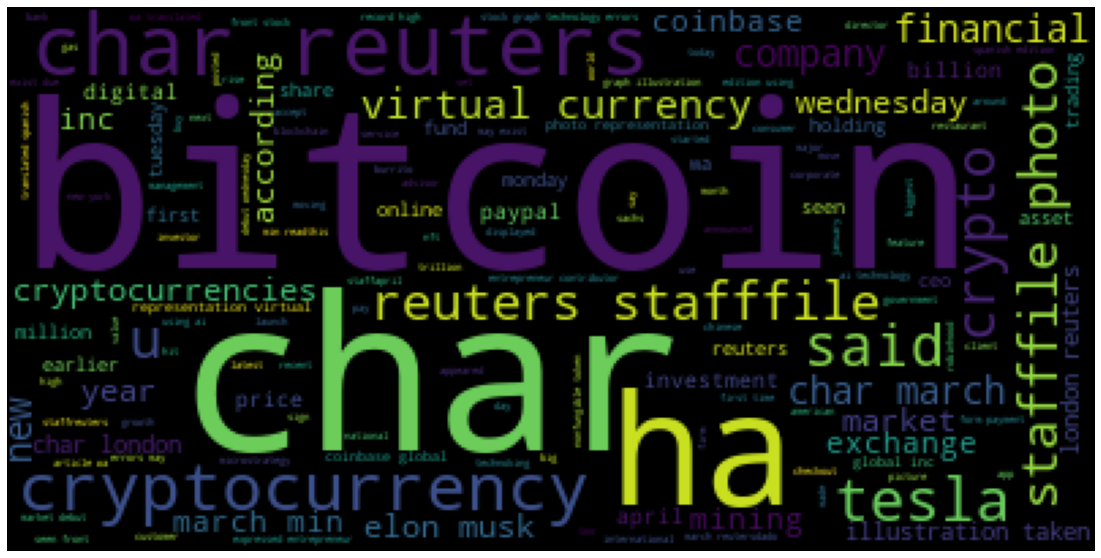

In [29]:
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(full_btc_str)
plt.axis("off")
plt.imshow(img);

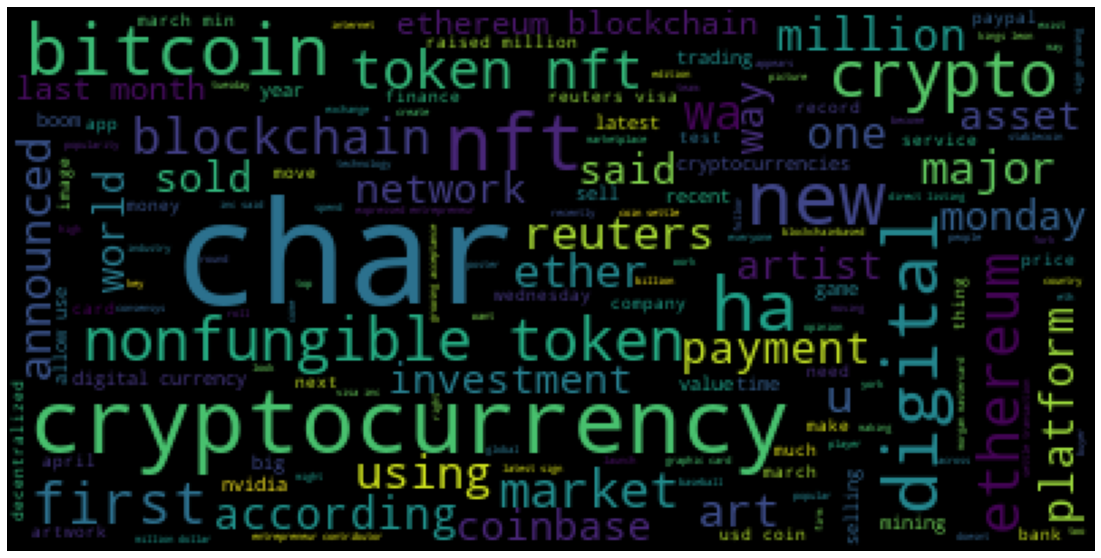

In [30]:
# Generate the Ethereum word cloud
wc = WordCloud()
img = wc.generate(full_eth_str)
plt.axis("off")
plt.imshow(img);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [48]:
import spacy
from spacy import displacy

In [49]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [50]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [39]:
# Concatenate all of the bitcoin text together
doc = nlp(full_btc_str)

In [51]:
# Run the NER processor on all of the text
for ent in doc.ents:
    print(ent.text, ent.label_)

# Add a title to the document
doc.user_data["Title"] = "Bitcoin NER"


one CARDINAL
first ORDINAL
million CARDINAL
first ORDINAL
million CARDINAL
one CARDINAL
recent week DATE
one CARDINAL
september DATE
today DATE
daily DATE
first ORDINAL
tuesday DATE
april eth DATE
last month DATE
million CARDINAL
india GPE
friday DATE
million CARDINAL
monday DATE
monday DATE
wednesday DATE
five CARDINAL
economieslast year DATE
monday DATE
two CARDINAL
four CARDINAL
first ORDINAL
yesterday DATE
two CARDINAL
first ORDINAL
first ORDINAL
million CARDINAL
first ORDINAL
million dollar MONEY
one calendar year DATE
one million dollar MONEY
monday DATE
tuesday DATE
million CARDINAL
million CARDINAL
one CARDINAL
century ago DATE
wednesday DATE
last month DATE
million dollar MONEY
april DATE
billion first quarter DATE
two CARDINAL
tuesday DATE
first ORDINAL
friday DATE
billion CARDINAL
today DATE
wednesday DATE
recent week DATE
nearly year DATE
first ORDINAL
first ORDINAL
last month DATE
eth CARDINAL
evening TIME
eth CARDINAL
million CARDINAL
last monday DATE
last month DATE
mill

In [52]:
# Render the visualization
displacy.render(doc, style='ent')

In [64]:
# List all Entities
print([ent.text for ent in doc.ents])

['one', 'first', 'million', 'first', 'million', 'one', 'recent week', 'one', 'september', 'today', 'daily', 'first', 'tuesday', 'april eth', 'last month', 'million', 'india', 'friday', 'million', 'monday', 'monday', 'wednesday', 'five', 'economieslast year', 'monday', 'two', 'four', 'first', 'yesterday', 'two', 'first', 'first', 'million', 'first', 'million dollar', 'one calendar year', 'one million dollar', 'monday', 'tuesday', 'million', 'million', 'one', 'century ago', 'wednesday', 'last month', 'million dollar', 'april', 'billion first quarter', 'two', 'tuesday', 'first', 'friday', 'billion', 'today', 'wednesday', 'recent week', 'nearly year', 'first', 'first', 'last month', 'eth', 'evening', 'eth', 'million', 'last monday', 'last month', 'million', 'weekyesterday', 'monday', 'billion', 'last month', 'last month', 'million', 'first']


---

## Ethereum NER

In [54]:
# Concatenate all of the ethereum text together
doc = nlp(full_eth_str)

In [55]:
# Run the NER processor on all of the text
for ent in doc.ents:
    print(ent.text, ent.label_)

# Add a title to the document
# YOUR CODE HERE!

one CARDINAL
first ORDINAL
million CARDINAL
first ORDINAL
million CARDINAL
one CARDINAL
recent week DATE
one CARDINAL
september DATE
today DATE
daily DATE
first ORDINAL
tuesday DATE
april eth DATE
last month DATE
million CARDINAL
india GPE
friday DATE
million CARDINAL
monday DATE
monday DATE
wednesday DATE
five CARDINAL
economieslast year DATE
monday DATE
two CARDINAL
four CARDINAL
first ORDINAL
yesterday DATE
two CARDINAL
first ORDINAL
first ORDINAL
million CARDINAL
first ORDINAL
million dollar MONEY
one calendar year DATE
one million dollar MONEY
monday DATE
tuesday DATE
million CARDINAL
million CARDINAL
one CARDINAL
century ago DATE
wednesday DATE
last month DATE
million dollar MONEY
april DATE
billion first quarter DATE
two CARDINAL
tuesday DATE
first ORDINAL
friday DATE
billion CARDINAL
today DATE
wednesday DATE
recent week DATE
nearly year DATE
first ORDINAL
first ORDINAL
last month DATE
eth CARDINAL
evening TIME
eth CARDINAL
million CARDINAL
last monday DATE
last month DATE
mill

In [56]:
# Render the visualization
displacy.render(doc, style='ent')

In [63]:
# List all Entities
print([ent.text for ent in doc.ents])

['one', 'first', 'million', 'first', 'million', 'one', 'recent week', 'one', 'september', 'today', 'daily', 'first', 'tuesday', 'april eth', 'last month', 'million', 'india', 'friday', 'million', 'monday', 'monday', 'wednesday', 'five', 'economieslast year', 'monday', 'two', 'four', 'first', 'yesterday', 'two', 'first', 'first', 'million', 'first', 'million dollar', 'one calendar year', 'one million dollar', 'monday', 'tuesday', 'million', 'million', 'one', 'century ago', 'wednesday', 'last month', 'million dollar', 'april', 'billion first quarter', 'two', 'tuesday', 'first', 'friday', 'billion', 'today', 'wednesday', 'recent week', 'nearly year', 'first', 'first', 'last month', 'eth', 'evening', 'eth', 'million', 'last monday', 'last month', 'million', 'weekyesterday', 'monday', 'billion', 'last month', 'last month', 'million', 'first']
